In [1]:
# Enable outputting results interactively. 
# All the results from code in a given cell will be displayed instead of only the last one.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:

import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import cufflinks
cufflinks.go_offline(connected=True)

In [3]:
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats
import sqlite3
import math
import datetime
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
reviews =  pickle.load( open( "../all_SF_reviews.p", "rb" ) )

loc =  pickle.load( open( "listings_loc.p", "rb" ) )

In [5]:
reviews.info()

conn = sqlite3.connect("airbnb.db")

# reviews.to_sql('reviews_db', conn, if_exists='replace')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662849 entries, 0 to 10637373
Data columns (total 6 columns):
listing_id       662849 non-null int64
id               662849 non-null int64
date             662849 non-null object
reviewer_id      662849 non-null int64
reviewer_name    662848 non-null object
comments         662259 non-null object
dtypes: int64(3), object(3)
memory usage: 35.4+ MB


In [6]:
reviews = reviews.merge(loc, how = 'left', on = 'listing_id')
reviews.groupby('std_nb').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,std_nb,counts
16,Mission,77197
36,Western Addition,51920
2,Castro/Upper Market,43298
31,South of Market,36423
1,Bernal Heights,36258
23,Outer Sunset,33698
11,Haight Ashbury,31220
18,Noe Valley,29470
6,Downtown/Civic Center,27567
26,Potrero Hill,23688


In [7]:
reviews = reviews.set_index(pd.DatetimeIndex(reviews['date']))
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,std_nb
date,,,,,,,
2009-07-23,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",Western Addition
2009-08-03,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,Western Addition
2009-09-27,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,Western Addition
2009-11-05,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,Western Addition
2010-02-13,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,Western Addition


In [8]:
reviews.groupby('reviewer_id').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,reviewer_id,counts
50537,2895282,87
65497,3973648,57
240318,24713363,54
135113,10172884,53
350463,49656450,45
146928,11494959,44
165544,13749295,43
265744,28983728,42
92649,6090715,41
89348,5834919,38


In [9]:
reviews.groupby(['reviewer_id','listing_id']).size().reset_index(name='counts').sort_values(by='counts', ascending= False)

,reviewer_id,listing_id,counts
67702,2895282,472901,57
424663,49656450,256148,32
407787,45106320,8144647,27
426816,50309421,15068542,26
411357,45970431,5863674,25
447118,56736852,8352275,19
397579,42677539,6629798,15
422621,49054545,4650391,15
4109,136374,23611,14
164364,9386506,7921739,14


In [10]:
reviews_sub = pd.read_sql_query(
    'select * \
        from reviews_db  \
        where reviewer_id = 2895282 and listing_id = 472901;' ,conn)
    
    

In [11]:
reviews_sub

,index,listing_id,id,date,reviewer_id,reviewer_name,comments
0,33665,472901,10332449,2014-02-14,2895282,Emily,"Jin was super quick with email responses, grea..."
1,33690,472901,19827111,2014-09-19,2895282,Emily,3rd time staying w. Jin - continue to be great...
2,33691,472901,20842382,2014-10-06,2895282,Emily,Great stay per usual (wonderful communications...
3,33692,472901,21033596,2014-10-10,2895282,Emily,I've stayed w. Jin many times and continues to...
4,33695,472901,22454897,2014-11-07,2895282,Emily,Stayed w. Jin many times - see below. Great ex...
5,33696,472901,22774491,2014-11-14,2895282,Emily,Stayed w. Jin many times - see below. Continue...
6,33699,472901,24078093,2014-12-19,2895282,Emily,Thanks Jin for another great stay. Have a happ...
7,33702,472901,26175996,2015-02-06,2895282,Emily,Stayed w. Jin many times. See below for more. ...
8,33703,472901,26205902,2015-02-07,2895282,Emily,Continues to be great experience. See below fo...
9,33704,472901,26387572,2015-02-11,2895282,Emily,Stayed w. Jin many times. See below for full f...


In [12]:
reviews[reviews['reviewer_id'] == 3973648]

,listing_id,id,date,reviewer_id,reviewer_name,comments,std_nb
date,,,,,,,
2014-05-17,271602,13007495,2014-05-17,3973648,Matt,Richard was a joy to deal with - very prompt i...,South of Market
2014-09-12,271602,19414157,2014-09-12,3973648,Matt,"I've stayed at dozens of AirBnB places, and Ri...",South of Market
2015-04-16,271602,30038719,2015-04-16,3973648,Matt,Richard is an incredible host with a very comf...,South of Market
2015-11-20,271602,54442241,2015-11-20,3973648,Matt,This was my third time staying in Richard's ap...,South of Market
2017-07-21,271602,172755007,2017-07-21,3973648,Matt,I've stayed at Richard's place multiple times ...,South of Market
2017-12-01,271602,215804581,2017-12-01,3973648,Matt,Just enjoyed my fifth (!) stay at Richard’s gr...,South of Market
2017-06-16,1598872,161104910,2017-06-16,3973648,Matt,"Teresa's flat was fantastic. Clean, spacious a...",Western Addition
2018-05-25,5413930,268718292,2018-05-25,3973648,Matt,"Doris’ apartment was very spacious, well equip...",Mission
2016-09-03,7180020,99088125,2016-09-03,3973648,Matt,I've stayed in well over 30+ AirBnB locations ...,South of Market


In [13]:
reviews_sub = pd.read_sql_query(
    'select * \
        from reviews_db  \
        where reviewer_id = 49656450 and listing_id = 256148;' ,conn)
    
reviews_sub

,index,listing_id,id,date,reviewer_id,reviewer_name,comments
0,23821,256148,59849661,2016-01-16,49656450,Richard,Chris was great and so was her apartment. The ...
1,23827,256148,61493437,2016-02-05,49656450,Richard,This is the second time I've stayed at Chris' ...
2,23828,256148,62295063,2016-02-13,49656450,Richard,This is the third time I've stayed at Chris' a...
3,23832,256148,64530159,2016-03-05,49656450,Richard,This is the third time I've stayed at Chris'. ...
4,23834,256148,65269405,2016-03-12,49656450,Richard,Chris is my go-to host! Her place is always sp...
5,23841,256148,69142976,2016-04-09,49656450,Richard,"As always, a wonderful experience! Chris is th..."
6,23849,256148,77795436,2016-06-03,49656450,Richard,Chris' place is my go-to place in SF! It's a l...
7,23866,256148,93445250,2016-08-12,49656450,Richard,I love Chris' place! I haven't been in a while...
8,23878,256148,102071716,2016-09-16,49656450,Richard,"As always, staying at Chris' is the best SF ex..."
9,23884,256148,104976665,2016-09-29,49656450,Richard,I love coming to Chris' place; I now just time...


In [14]:
set(reviews_sub['comments'])

{"Another great stay at Chris' place! It's comfy, homey and perfectly located and Chris is the most amazing host. The neighborhood is great fun especially on a weekend and it was great to laze around the room until I got myself together to go out. Great place to stay at while exploring SF!",
 "Another wonderful time at Chris'! Nothing like coming back to a comfy, clean room after a day in the trenches. Chris's place is all that and more. The amenities in the room (coffee, cereal) let me get my first couple of (Hidden by Airbnb) calls in while still comfortable letting me gear up for the rest of the day! Love it here!",
 "Another wonderful time at Chris'! Nothing like coming back to a comfy, clean room after a day in the trenches. Chris's place is all that and more. The amenities in the room (coffee, cereal) let me get my first couple of (SENSITIVE CONTENTS HIDDEN) calls in while still comfortable letting me gear up for the rest of the day! Love it here!",
 "As I've said before about Ch

In [16]:
reviews.groupby('listing_id').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,listing_id,counts
959,545685,741
12,8739,715
413,205842,674
3049,1920033,672
1022,585326,667
1293,748256,653
995,567239,652
1291,748222,643
2346,1393654,638
93,33577,634


In [17]:
reviews_tab = reviews.resample('W').size().reset_index(name='Counts') 
reviews_tab = reviews_tab.set_index(pd.DatetimeIndex(reviews_tab['date']))

reviews_tab = reviews_tab['2015-05-01':]
reviews_tab

,date,Counts
date,,
2015-05-03,2015-05-03,1676
2015-05-10,2015-05-10,1605
2015-05-17,2015-05-17,1702
2015-05-24,2015-05-24,2165
2015-05-31,2015-05-31,2021
2015-06-07,2015-06-07,1597
2015-06-14,2015-06-14,2110
2015-06-21,2015-06-21,2106
2015-06-28,2015-06-28,2139


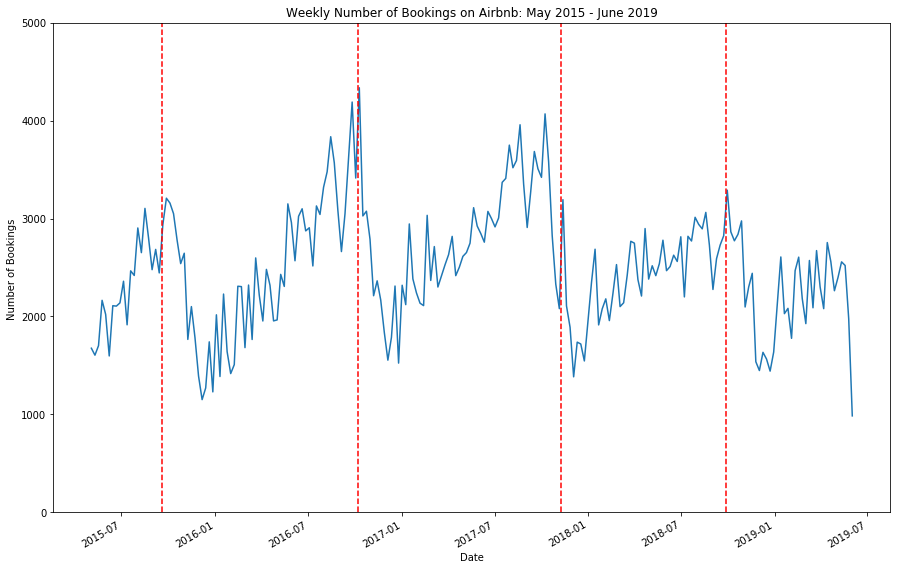

In [19]:

# reviews_tab[reviews_tab['Counts'] > 0]

xlinspace = pd.date_range('2015-05-01', periods= reviews_tab.shape[0], freq='W')

fig, ax = plt.subplots(1,figsize = (15,10))
fig.autofmt_xdate()
plt.plot(xlinspace,reviews_tab['Counts'])

# Dreamforce dates 2015 - 2018

plt.axvline(x= datetime.date(2015,9,18), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2016,10,7), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2017,11,9), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2018,9,28), color = 'red', linestyle='--')
    
ax.set_ylim(0,5000)
plt.xlabel("Date")
plt.ylabel("Number of Bookings ")
plt.title("Weekly Number of Bookings on Airbnb: May 2015 - June 2019")

xfmt = mdates.DateFormatter('%m-%d-%y')
# ax.xaxis.set_major_formatter(xfmt)

plt.show();

In [24]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id               int64
reviewer_name            object
comments                 object
std_nb                   object
dtype: object

In [ ]:
reviews_sub = reviews['2015-05-01':]

In [35]:
reviews_sub.groupby('std_nb').size().reset_index(name='counts').sort_values(by='counts', ascending = False)



,std_nb,counts
16,Mission,59025
36,Western Addition,39796
2,Castro/Upper Market,32215
23,Outer Sunset,30416
31,South of Market,29301
1,Bernal Heights,29128
18,Noe Valley,23900
6,Downtown/Civic Center,23557
11,Haight Ashbury,23137
12,Inner Richmond,18574


In [57]:
grouper = reviews_sub.groupby([pd.Grouper(freq='1W'), 'std_nb'])
demand_loc = grouper.size().reset_index(name = 'counts')

demand_loc.head()

,date,std_nb,counts
0,2015-05-03,Bayview,12
1,2015-05-03,Bernal Heights,41
2,2015-05-03,Castro/Upper Market,71
3,2015-05-03,Chinatown,5
4,2015-05-03,Crocker Amazon,1


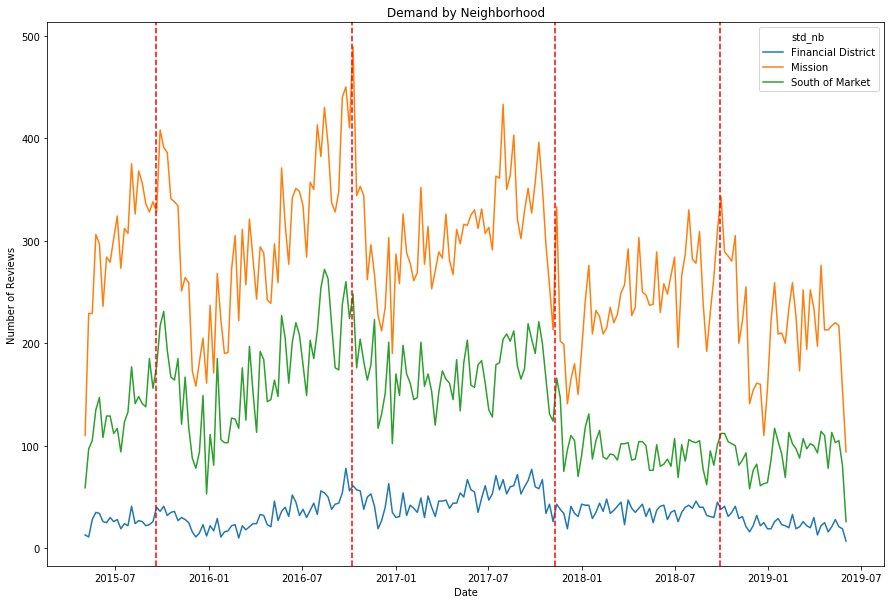

In [58]:
lst = ['Mission', 'South of Market', 'Financial District']

for_chart = demand_loc[demand_loc['std_nb'].isin(lst)]

fig, ax = plt.subplots(1,1,figsize = (15,10))

sns.lineplot(x= 'date', y='counts', hue = 'std_nb', data = for_chart)
# Dreamforce dates 2015 - 2018

plt.axvline(x= datetime.date(2015,9,18), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2016,10,7), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2017,11,9), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2018,9,28), color = 'red', linestyle='--')

plt.title("Demand by Neighborhood")
plt.xlabel("Date")
plt.ylabel("Number of Reviews");